### Ejercicio 2: Refinería

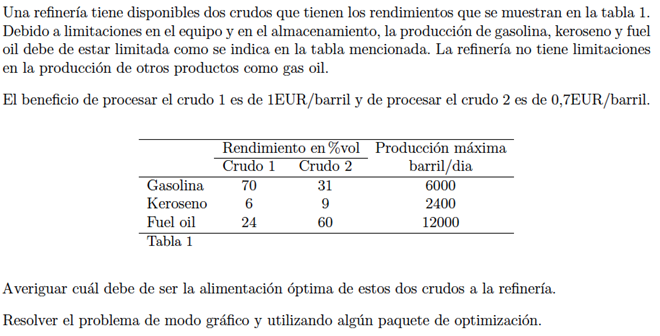

#### Planteamos el problema como un problema de LP

$$
\begin{align}
	&\text{max }  && V_1+0.7V_2 &&\\
	&\text{s.t. }  && \\
	&\text{Gasolina }  && 0.7V_1+0.31V_2 \le  6000\\
    &\text{Keroseno }  && 0.06V_1+0.09V_2 \le 2400 \\
    &\text{Fuel oil } && 0.24V_1+0.6V_2 \le 12000 \\
    & && V_1,V_2 \geq  0  \\
\end{align}
$$

#### Importamos Pyomo

In [1]:
from pyomo.environ import *

#### Creamos un problema concreto, es decir, un objeto de la clase problema que ya contenga parámetros

In [2]:
model = ConcreteModel()

#### Definimos las variables como no negativas

In [3]:
model.V1 = Var(domain=NonNegativeReals)
model.V2 = Var(domain=NonNegativeReals)

#### Definimos la función objetivo

In [4]:
model.profit = Objective(expr = model.V1 + 0.7*model.V2, sense=maximize)

#### Definimos la restricciones

In [5]:
model.Gasolina = Constraint(expr = 0.7*model.V1+0.31*model.V2 <= 6000)
model.Keroseno= Constraint(expr = 0.06*model.V1+0.09*model.V2 <= 2400)
model.FuelOil = Constraint(expr = 0.24*model.V1+0.6*model.V2 <= 12000)

In [6]:
model.dual = Suffix(direction=Suffix.IMPORT_EXPORT)
model.rc = Suffix(direction=Suffix.IMPORT_EXPORT)

results = SolverFactory('glpk').solve(model)
results.write()
model.pprint()
  
str = "{0:7.2f} {1:7.2f} {2:7.2f} {3:7.2f}"

print("Restricción  valor  lslack  uslack    dual")
for c in [model.Gasolina, model.Keroseno,model.FuelOil ]:
    print(c, str.format(c(), c.lslack(), c.uslack(), model.dual[c]))


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 13548.3870967742
  Upper bound: 13548.3870967742
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 3
  Number of nonzeros: 7
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.028922557830810547
# ----------------------------------------------------------
#   Solution Information
# --------------